# Goal: Run post process mean segmentation on the whole dataset

In [5]:
%reset -f
%load_ext autoreload
%autoreload 2
#matplotlib figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from custom_imports import *
from mri_project.post_process import (segment_mus_from_labels, muscle_mean_thresh, 
                                      muscle_mean_thresh, post_mus_from_multiclass_mask, 
                                     muscle_outlier_thresh)
from mri_project.pipeline import get_largest_contour_of_each_color
from mri_project.utility import dfe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
m9 = tf.keras.models.load_model("../data/models/new_era.v02.9muscles.h5")
m11 = tf.keras.models.load_model("../data/models/new_era.v03.11muscles.h5")

In [7]:
root = "../data/data/images_with_predictions_v06"
files = glob.glob(f"{root}/*data")
len(files)

832

In [8]:
target = "../data/data/images_with_predictions_v07/"
if os.path.exists(target):
    print(f"deleting ${target}")
    shutil.rmtree(target)
os.mkdir(target)

deleting $../data/data/images_with_predictions_v07/


In [11]:
for file in files:
    data = joblib.load(file)
    data.get_traced_contours(89.9)
    n_muscles = len(data.traced_contours)
    if n_muscles < 11:
        data.predict(m9)
    else:
        data.predict(m11)
    gray_raw_image = cv2.equalizeHist(np.uint8(data.raw_image.mean(axis=2)))
    tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, muscle_outlier_thresh, r=1)
    # tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, muscle_mean_thresh, std_ratio=1/5)
    # tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, post_mus_from_multiclass_mask, 2)
    data.predicted_postprocessed = get_largest_contour_of_each_color(tmp_)
    d, f, e = dfe(file)
    target_file = (target + f + e).replace(':', '_')
    print(target_file)
    joblib.dump(data, target_file)

[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO5-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF1B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM8B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6B-2_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO2RR-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM2B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM5B-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM3B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM6B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWF1-2_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF3B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO1-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM9-17_50ConRaw.data
../data/data/images_with_predictions_v07/4-WF3-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO3FCWM5-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM8-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4-6_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF1-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2-17_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2-15_16PreRaw.data
../data/data/images_with_predictions_v07/2-CO3FCWM5-8_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO1-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO6-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7-17_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM1B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO4-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5-10_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2-17_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM4B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCCO6-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF4B-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4-10_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO6-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF3B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6B-14_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF2B-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM3B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM1-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM6B-6_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1B-11_16RepPostRaw.data
../data/data/images_with_predictions_v07/3-WF6B-16_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-REWF4-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO5-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM4B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3B-9_50ConRaw.data
../data/data/images_with_predictions_v07/3-COM2B-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF6-22_50ConRaw.data
../data/data/images_with_predictions_v07/2-WM4B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF3-10_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM3B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF6B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6B-4_50ConRaw.data
../data/data/images_with_predictions_v07/1-WM4B-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO5-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3-11_16RepPreRaw.data
../data/data/images_with_predictions_v07/2-WM2B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM8B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2-12_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM4B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF3-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF3-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF2-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM5B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1B-3_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM1B-15_50ConRaw.data
../data/data/images_with_predictions_v07/2-CO3FCWM5-8_16PreRaw.data
../data/data/images_with_predictions_v07/2-COF7-12_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO2RR-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF4B-21_50PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6-4_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF1-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6B-10_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-WF5-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM2B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM8B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM8-18_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF4B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO1-15_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4B-15_50RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO4-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM2-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM3-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM1-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM1B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6-3_16PreRaw.data
../data/data/images_with_predictions_v07/3-WM2B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCCO6-7_16PreRaw.data
../data/data/images_with_predictions_v07/3-COM2B-17_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF6B-13_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO4-1_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7-6_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM3B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM3B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM2B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM6B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM1B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1-7_16RepPreRaw.data
../data/data/images_with_predictions_v07/3-COF3B-15_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-REWF4-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM6B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2B-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6B-4_50PreConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM1B-14_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO5-15_50ConRaw.data
../data/data/images_with_predictions_v07/4-WF3B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM6B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO5-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6-6_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO3-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1B-14_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2B-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM8B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM9B-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM4B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM2B-5_50RepConRaw.data
../data/data/images_with_predictions_v07/4-COF3B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO3-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM3-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM1B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2-6_50ConRaw.data
../data/data/images_with_predictions_v07/4-WF6-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF2B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM8B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM4B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM2B-7_16PostRaw.data
../data/data/images_with_predictions_v07/4-WM1-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3-17_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF6B-13_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-WM2B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6B-6_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM3B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO3FCWM5-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO5-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1B-8_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7-2_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF5B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF2-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM4B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7-12_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO5-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM6B-2_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO2RR-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM2-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM1B-11_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-WM2-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM8B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM2-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCCO6-1_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM5B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5B-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM8-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4B-15_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WF5B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM1B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM9B-6_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6-3_16repPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCCO6-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM4-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF1-5_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM3B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF5-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO2RR-3_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO4-18_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM9-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6B-8_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF6-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF5-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM4B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6-11_16PreRaw.data
../data/data/images_with_predictions_v07/2-WM4B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM6B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF3B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8B-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM4B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1-12_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF1-10_16RepPreRaw.data
../data/data/images_with_predictions_v07/4-FCWM4-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM3-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF3B-2_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO1-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF3-6_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO6-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM1B-2_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO1-10_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF6B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM3-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM8-12_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM3B-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO2RR-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9B-8_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO3-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6-6_16RepPreRaw.data
../data/data/images_with_predictions_v07/4-COF3B-14_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-WM4B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM2B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM4B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO4-12_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCCO6-1_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM9-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF2-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3-9_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WF5-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM1-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM2B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM4B-10_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5B-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO4-18_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6-1_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6-11_16RepPreRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF1-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF1B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM6-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM4B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8B-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2B-16_50ConRaw.data
../data/data/images_with_predictions_v07/4-FCWM2-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-REWF4-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF3-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO1-11_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM9-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4B-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWF3-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7B-16_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF3B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF1-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM9-6_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO3FCWM5-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO2RR-15_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF3B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO1-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM6-1_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM9-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF6B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM6-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO2RR-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM6B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO2RR-16_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WM2-14_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM1B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM6B-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO4-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6-5_50RepConRaw.data
../data/data/images_with_predictions_v07/4-WM1-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3B-2_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF3-6_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM2B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM1B-14_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF3B-7_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-COF6-15_16RepPreRaw.data
../data/data/images_with_predictions_v07/3-WM3B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3B-2_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM2B-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO4-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM3B-6_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5B-3_16PostRaw.data
../data/data/images_with_predictions_v07/2-CO3-8_50ConRaw.data
../data/data/images_with_predictions_v07/4-WM6B-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5-3_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM1-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM5B-3_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM4B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2B-11_16PostRaw.data
../data/data/images_with_predictions_v07/1-WM4-2_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2-12_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1-10_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-REWF4-6_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO5-21_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-REWF4-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO6-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF5-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4B-4_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WM1-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM3-14_16RepPreRaw.data
../data/data/images_with_predictions_v07/4-FCWM1-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO1-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM6B-2_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM6-11_16PreRaw.data
../data/data/images_with_predictions_v07/4-COF6B-21_50PreConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM3B-3_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM3B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM8-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM5B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM2B-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2-12_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF3B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF2-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO3-14_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM2-14_50RepConRaw.data
../data/data/images_with_predictions_v07/2-WM4-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM1B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3B-10_16RepPostRaw.data
../data/data/images_with_predictions_v07/3-WF5B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM1B-2_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM9-1_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO5-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM2-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO4-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM1B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF1-6_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4B-9_50RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM2-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM1B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5-21_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM3B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6B-6_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO6-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM3B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM8B-6_16RepPostRaw.data
../data/data/images_with_predictions_v07/3-FCWM3-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO1-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5B-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6B-10_50PreConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4-12_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM4-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM6B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO4-6_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-REWF4-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF3B-2_16PostRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2B-4_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM6-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF1-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO3FCWM5-11_16PreRaw.data
../data/data/images_with_predictions_v07/3-WF3-16_50ConRaw.data
../data/data/images_with_predictions_v07/4-WM2B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-REWF4-2_16RepPreRaw.data
../data/data/images_with_predictions_v07/4-WM2-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5B-6_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF2B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM4B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM5B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4B-3_16PostRaw.data
../data/data/images_with_predictions_v07/4-WM2B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2-12_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF4B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2B-22_50ConRaw.data
../data/data/images_with_predictions_v07/1-WM4B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM8B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6-5_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WM2B-11_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-COF6B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM9B-8_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO2RR-7_16RawPre.data
../data/data/images_with_predictions_v07/4-WF5-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8-1_50ConRaw.data
../data/data/images_with_predictions_v07/4-WF3B-22_50RepConRaw.data
../data/data/images_with_predictions_v07/3-FCWM4-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF3B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM9-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM2B-6_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7B-5_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF6-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM3B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF5B-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF7-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF4B-4_50ConRaw.data
../data/data/images_with_predictions_v07/1-FCWM4-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM5B-9_50ConRaw.data
../data/data/images_with_predictions_v07/4-COF6-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO1-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM8B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM1B-2_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWF2-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM3-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF2B-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO2RR-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF1B-19_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM2B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2B-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2-21_50RepConRaw.data
../data/data/images_with_predictions_v07/2-WM4B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4B-15_50PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM4B-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM6B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4-12_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM3-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO5-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO5-15_16RepPreRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM6B-3_16PostRaw.data
../data/data/images_with_predictions_v07/4-FCWM1-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM2B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF4B-3_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM5B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO1-7_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCCO6-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF2B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF6-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF4-18_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM5B-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF4-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4-6_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF2-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6-11_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM4B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM2B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM4B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5-9_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF4-18_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM8-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF6-18_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM6B-4_50RepConRaw.data
../data/data/images_with_predictions_v07/4-WM1B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM8-7_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM4-7_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM4B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCCO6-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCCO6-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF3B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM9B-3_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM2-9_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM1B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF6B-10_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM6B-14_50RepConRaw.data


muscles not of size 9 or 11


../data/data/images_with_predictions_v07/2-COF2-7_16PreRaw.data
../data/data/images_with_predictions_v07/4-FCWM4-15_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF2B-16_50RepConRaw.data
../data/data/images_with_predictions_v07/4-WM2B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWF3-14_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM5B-11_16RepPostRaw.data
../data/data/images_with_predictions_v07/3-WF3-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF4B-3_50PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM6B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF2B-4_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO4-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM3B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM3B-2_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM9B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF5B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3-4_50ConRaw.data
../data/data/images_with_predictions_v07/4-WM9B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-REWF4-15_16RepPreRaw.data
../data/data/images_with_predictions_v07/2-CO3-8_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO6-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1B-13_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF1-10_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF2B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM8-12_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM5B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO6-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2B-10_50RepConRaw.data
../data/data/images_with_predictions_v07/4-COF6-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM1B-15_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-COF2-22_50RepConRaw.data
../data/data/images_with_predictions_v07/4-WF3-22_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WF5-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM1-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1B-14_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM9-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO5-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF2B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF6B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM1-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM3B-3_16PostRaw.data
../data/data/images_with_predictions_v07/4-WM6B-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO4-1_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO1-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF4-1_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM2-3_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM6-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM3B-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM6B-6_16RepPostRaw.data
../data/data/images_with_predictions_v07/4-FCWM2-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-FCWM2-6_16PreRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWF3-2_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM1B-2_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWF3-10_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF5-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM9-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM6B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-CO2RR-22_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF1B-2_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO2RR-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM8-10_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5-5_50ConRaw.data
../data/data/images_with_predictions_v07/3-WM8B-16_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF4B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM8-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM2B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM5B-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM6B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO4-11_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM6-2_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF6B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF1B-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM3B-6_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF3B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO5-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-CO1-3_16RawPre.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6-5_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3B-6_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF5B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO4-12_50ConRaw.data
../data/data/images_with_predictions_v07/4-WM6-17_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM8B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3B-4_50RepConRaw.data
../data/data/images_with_predictions_v07/1-WM4-2_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM6B-4_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM3-3_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO2RR-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-FCWM6-14_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM2B-22_50ConRaw.data


muscles not of size 9 or 11


../data/data/images_with_predictions_v07/4-WM6-17_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1-12_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM2B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWF1-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7B-10_50RepConRaw.data
../data/data/images_with_predictions_v07/4-WM1B-21_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM6B-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1B-8_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM8-4_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF3-3_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF3-11_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF7-10_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO2RR-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM1B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM4B-14_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4B-9_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF2-4_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF4-15_16RepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF5B-17_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM8-1_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF5B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM2B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF1B-15_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM8-10_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF5-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COM1B-9_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COF1-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-FCWM6-2_16PreRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM3B-6_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF6B-10_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF3-4_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF1B-2_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF1B-7_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-CO5-7_16PreRaw.data
../data/data/images_with_predictions_v07/4-WF6B-20_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF1B-7_16PostRaw.data
../data/data/images_with_predictions_v07/4-WF6B-20_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WM6B-8_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COF3-22_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM4B-10_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF3B-7_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM4B-3_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF2B-10_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM9-1_50RepConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM4B-15_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-FCWM1-10_16RepRepPreRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-COM4B-11_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9-10_50RepConRaw.data
../data/data/images_with_predictions_v07/3-WF6B-16_50ConRaw.data


muscles not of size 9 or 11
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-WF4B-9_50PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COF7B-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WF1B-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-WM4-21_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-CO5-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF4B-15_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/4-COM6B-15_16PostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-COM4B-5_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF4B-3_50RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/2-COF7B-11_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WF5B-11_16RepPostRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WM1B-3_50RepConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/3-WM9B-16_50ConRaw.data


[*] Zero outliers found. Droppint back to mean ...
[*] Zero outliers found. Droppint back to mean ...


../data/data/images_with_predictions_v07/1-WF5B-3_16RepPostRaw.data


In [1]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
file = np.random.choice(files)
# ../data/images_with_predictions_v04/4-CO1-22:50ConRaw.data
# file = "../data/images_with_predictions_v04/4-COF2B-21:50ConRaw.data"
# file = "../data/images_with_predictions_v04/3-COF5B-17:50ConRaw.data"
data = joblib.load(file)
axes[0].imshow(data.raw_image)
axes[1].imshow(data.traced_multilabel_mask)
axes[2].imshow(data.predicted)
print(file)
assert data.has_good_prediction()

NameError: name 'plt' is not defined

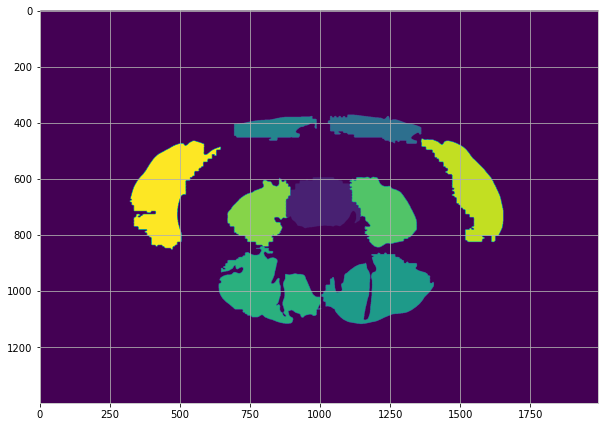

In [20]:
gray_raw_image = data.raw_image.mean(axis=2)
tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, muscle_mean_thresh, 1/5)
# tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, post_mus_from_multiclass_mask, 2)
plt.imshow(get_largest_contour_of_each_color(tmp_))

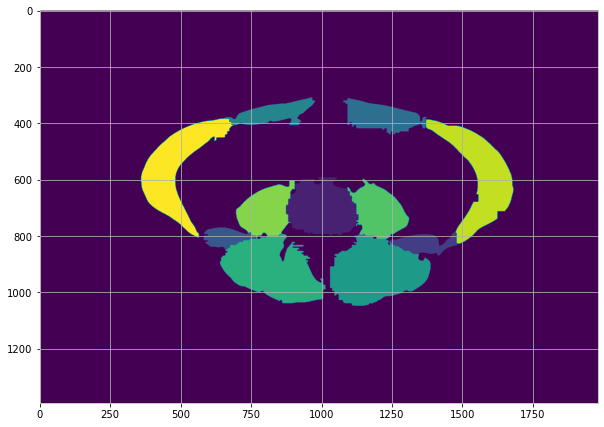

In [32]:
gray_raw_image = data.raw_image.mean(axis=2)
tmp_ = segment_mus_from_labels(gray_raw_image, data.predicted, post_mus_from_multiclass_mask, 2)
plt.imshow(get_largest_contour_of_each_color(tmp_))

In [ ]:
pip